In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
import statistics as stat

In [2]:
data = pd.read_excel("demographics_MENA.xlsx")
#data

In [3]:
#data.head()
#data.shape
#data.tail()
#data.dtypes

In [15]:
#data.info()

In [4]:
#data.nunique() "identify the continuous and categorical columns in the data"
#remarque len(dataframe)=nombre de lignes !!!!!!!!!!!!!!!!!!!!
missing_data=data.isna().sum()
perc_missingdata=(missing_data/(len(data)))*100
#missing_data
#perc_missingdata

In [5]:
#Some columns or variables can be dropped if they do not add value to our analysis.
data_EDA = data.drop(['Country Name','Time Code'],axis=1)

In [6]:
# Middle east north africa is not a country !!!!!!!!
data_EDA.rename(columns={'Country Code': 'Region'}, inplace=True)

In [7]:
#abbreviations of column names
data_EDA.rename(columns={
                         "Age dependency ratio (% of working-age population) [SP.POP.DPND]":"ADR"
                         ,"Age dependency ratio, old [SP.POP.DPND.OL]":"ADR_old"
                         ,"Age dependency ratio, young [SP.POP.DPND.YG]":"ADR_young"
                         ,"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]":"BRC"
                         ,"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]":"DRC"
                         ,"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]":"FRT"
                         ,"Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]":"LEB_F"
                         ,"Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]":"LEB_M"
                         ,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]":"LEB"
                         ,"Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]":"MR_A_F"
                         ,"Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]":"MR_A_M"
                         ,"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]":"MR_I"
                         ,"Mortality rate, infant, female (per 1,000 live births) [SP.DYN.IMRT.FE.IN]":"MR_I_F"
                         ,"Mortality rate, infant, male (per 1,000 live births) [SP.DYN.IMRT.MA.IN]":"MR_I_M"
                         ,"Mortality rate, neonatal (per 1,000 live births) [SH.DYN.NMRT]":"MR_n"
                         ,"Net migration [SM.POP.NETM]":"NM"
                         ,"Number of infant deaths [SH.DTH.IMRT]":"NID"
                         ,"Number of infant deaths, female [SH.DTH.IMRT.FE]":"NID_F"
                         ,"Number of infant deaths, male [SH.DTH.IMRT.MA]":"NID_M"
                         ,"Population growth (annual %) [SP.POP.GROW]":"PG_a"
                         ,"Population, female [SP.POP.TOTL.FE.IN]":"PF"
                         ,"Population, male [SP.POP.TOTL.MA.IN]":"PM"
                         ,"Population, total [SP.POP.TOTL]":"PT"
                         ,"Rural population [SP.RUR.TOTL]":"RP"
                         ,"Rural population growth (annual %) [SP.RUR.TOTL.ZG]":"RPG_a"
                         ,"Urban population [SP.URB.TOTL]":"UP"
                         ,"Urban population growth (annual %) [SP.URB.GROW]":"UPG_a"
                         ,"Population ages 65 and above, total [SP.POP.65UP.TO]":"PA>=65"
                         ,"Population ages 15-64, total [SP.POP.1564.TO]":"15<PA<64"
                         ,"Population ages 0-14, total [SP.POP.0014.TO]":"0<PA<14"
                        }, inplace=True)

#data_EDA.info()

In [29]:
#data_EDA.describe().T


In [17]:
data_EDA

,Time,Region,ADR,ADR_old,ADR_young,BRC,DRC,FRT,LEB_F,LEB_M,...,PF,PM,PT,RP,RPG_a,UP,UPG_a,PA>=65,15<PA<64,0<PA<14
0,2013,MAR,51.115023,8.348314,42.766709,21.141000,5.796000,2.594000,73.976000,70.371000,...,16812735,16990792,33803527,13622821,-0.030885,20180706,2.283304,1867468,22369402,9566657
1,2013,DZA,49.534709,7.428022,42.106687,25.236000,4.673000,2.957000,75.840000,73.430000,...,18629532,19371095,38000626,11561310,-0.182650,26439316,2.921299,1887652,25412579,10700395
2,2013,LBY,57.857339,7.191778,50.665561,21.886000,5.056000,2.716000,74.999000,69.983000,...,2939742,3045479,5985221,1271500,0.804010,4713721,2.256391,272679,3791538,1921004
3,2013,MEA,54.832405,6.678890,46.627576,24.785522,5.057609,2.970728,74.689240,70.216334,...,203833535,218956876,422790409,155267531,1.146279,267522878,2.652694,18419123,275781198,128590089
4,2014,MAR,51.105229,8.583568,42.521660,20.617000,5.741000,2.548000,74.390000,70.788000,...,17027786,17220817,34248603,13611765,-0.081191,20636838,2.235073,1945500,22665399,9637704
5,2014,DZA,50.679694,7.629553,43.050141,25.404000,4.555000,3.004000,76.467000,73.803000,...,19004433,19755734,38760168,11542390,-0.163783,27217778,2.901822,1962592,25723551,11074025
6,2014,LBY,57.198571,7.207130,49.991441,21.908000,5.430000,2.754000,75.301000,68.237000,...,2997221,3100543,6097764,1279982,0.664871,4817782,2.183604,279566,3879020,1939178
7,2014,MEA,55.305743,6.833397,46.954245,24.538066,5.007248,2.974571,74.936272,70.517108,...,208078483,223586099,431664579,156895112,1.048243,274769467,2.708774,19180575,280688730,131795275
8,2015,MAR,51.189767,8.871757,42.318009,20.307000,5.705000,2.531000,74.777000,71.166000,...,17235856,17444602,34680458,13591618,-0.148121,21088840,2.166626,2035036,22938364,9707059
9,2015,DZA,51.961774,7.887966,44.073808,25.405000,4.437000,3.041000,76.824000,74.456000,...,19390923,20152232,39543154,11527620,-0.128045,28015534,2.888878,2052589,26021777,11468788


In [9]:
data_EDA.columns

Index(['Time', 'Region', 'ADR', 'ADR_old', 'ADR_young', 'BRC', 'DRC', 'FRT',
       'LEB_F', 'LEB_M', 'LEB', 'MR_A_F', 'MR_A_M', 'MR_I', 'MR_I_F', 'MR_I_M',
       'MR_n', 'NM', 'NID', 'NID_F', 'NID_M', 'PG_a', 'PF', 'PM', 'PT', 'RP',
       'RPG_a', 'UP', 'UPG_a', 'PA>=65', '15<PA<64', '0<PA<14'],
      dtype='object')

In [23]:
data_MAR=data_EDA.iloc[:36:4, :]
data_DZA=data_EDA.iloc[1:36:4, :]
data_LBY=data_EDA.iloc[2:36:4, :]
data_MEA=data_EDA.iloc[3:36:4, :]
#data_MAR
#data_DZA
#data_LBY
#data_MEA

In [29]:
data_MEA

,Time,Region,ADR,ADR_old,ADR_young,BRC,DRC,FRT,LEB_F,LEB_M,...,PF,PM,PT,RP,RPG_a,UP,UPG_a,PA>=65,15<PA<64,0<PA<14
3,2013,MEA,54.832405,6.678890,46.627576,24.785522,5.057609,2.970728,74.689240,70.216334,...,203833535,218956876,422790409,155267531,1.146279,267522878,2.652694,18419123,275781198,128590089
7,2014,MEA,55.305743,6.833397,46.954245,24.538066,5.007248,2.974571,74.936272,70.517108,...,208078483,223586099,431664579,156895112,1.048243,274769467,2.708774,19180575,280688730,131795275
11,2015,MEA,55.717843,7.000901,47.244190,24.015800,4.956075,2.951749,75.142270,70.832811,...,212191189,228315279,440506473,158329611,0.914304,282176862,2.695858,19993780,285588652,134924045
15,2016,MEA,55.906616,7.176701,47.335708,23.045558,4.898086,2.871159,75.562196,70.966163,...,216061701,232855706,448917409,159816969,0.939406,289100440,2.453631,20851051,290538095,137528265
19,2017,MEA,55.970221,7.369804,47.295638,22.555495,4.778578,2.838007,76.086039,71.368280,...,219860378,237025104,456885486,161228918,0.883479,295656568,2.267768,21770582,295402440,139712468
23,2018,MEA,55.964417,7.576137,47.181817,21.887915,4.773046,2.783049,76.194284,71.642446,...,223852488,241221003,465073490,162677001,0.898153,302396489,2.279645,22767557,300516699,141789239
27,2019,MEA,55.858771,7.789915,46.963652,21.058566,4.793649,2.700352,76.246402,71.862269,...,227893479,245308297,473201775,164138698,0.898527,309063077,2.204585,23819817,305777620,143604338
31,2020,MEA,55.800832,8.016920,46.782678,20.599688,5.285240,2.660517,75.321682,70.812576,...,231463027,248503623,479966649,165300297,0.707694,314666352,1.812988,24857005,310056780,145052865
35,2021,MEA,55.667365,8.224893,46.528262,20.142055,5.545467,2.629065,75.084944,70.640202,...,234775082,251392983,486168063,166238691,0.567690,319929372,1.672572,25839087,314157127,146171850


In [34]:
#data_MAR.describe().T
#data_DZA.describe().T
#data_LBY.describe().T
#data_MEA.describe().T

In [30]:
data_MAR_POP=data_MAR[['Time', 'Region','ADR', 'ADR_old', 'ADR_young','NM',  'PG_a', 'PF', 'PM', 'PT', 'RP','RPG_a', 'UP', 'UPG_a', 'PA>=65', '15<PA<64', '0<PA<14']]
data_DZA_POP=data_DZA[['Time', 'Region','ADR', 'ADR_old', 'ADR_young','NM',  'PG_a', 'PF', 'PM', 'PT', 'RP','RPG_a', 'UP', 'UPG_a', 'PA>=65', '15<PA<64', '0<PA<14']]
data_LBY_POP=data_LBY[['Time', 'Region','ADR', 'ADR_old', 'ADR_young','NM',  'PG_a', 'PF', 'PM', 'PT', 'RP','RPG_a', 'UP', 'UPG_a', 'PA>=65', '15<PA<64', '0<PA<14']]
data_MEA_POP=data_MEA[['Time', 'Region','ADR', 'ADR_old', 'ADR_young','NM',  'PG_a', 'PF', 'PM', 'PT', 'RP','RPG_a', 'UP', 'UPG_a', 'PA>=65', '15<PA<64', '0<PA<14']]


data_MAR_MOR=data_MAR[['Time', 'Region', 'DRC', 'MR_A_F', 'MR_A_M', 'MR_I', 'MR_I_F', 'MR_I_M','MR_n',  'NID', 'NID_F', 'NID_M']]
data_DZA_MOR=data_DZA[['Time', 'Region', 'DRC', 'MR_A_F', 'MR_A_M', 'MR_I', 'MR_I_F', 'MR_I_M','MR_n',  'NID', 'NID_F', 'NID_M']]
data_LBY_MOR=data_LBY[['Time', 'Region', 'DRC', 'MR_A_F', 'MR_A_M', 'MR_I', 'MR_I_F', 'MR_I_M','MR_n',  'NID', 'NID_F', 'NID_M']]
data_MEA_MOR=data_MEA[['Time', 'Region', 'DRC', 'MR_A_F', 'MR_A_M', 'MR_I', 'MR_I_F', 'MR_I_M','MR_n',  'NID', 'NID_F', 'NID_M']]


data_MAR_BIR=data_MAR[['Time', 'Region', 'BRC', 'FRT','LEB_F', 'LEB_M', 'LEB']]
data_DZA_BIR=data_DZA[['Time', 'Region', 'BRC', 'FRT','LEB_F', 'LEB_M', 'LEB']]
data_LBY_BIR=data_LBY[['Time', 'Region', 'BRC', 'FRT','LEB_F', 'LEB_M', 'LEB']]
data_MEA_BIR=data_MEA[['Time', 'Region', 'BRC', 'FRT','LEB_F', 'LEB_M', 'LEB']]


In [31]:
print("Médiane : ",stat.median(data_MAR['FRT']))

print("Mean : ",stat.mean(data_MAR['FRT']))

print("Mode : ",stat.mode(data_MAR['FRT']))

print("Quantiles : ",stat.quantiles(data_MAR['FRT']))

print("Variance : ",stat.pvariance(data_MAR_BIR['FRT']))

print("Standar_Deviation: ",stat.stdev(data_MAR_BIR['FRT']))

print("Variation_Coefficient: ",stats.variation(data_MAR_BIR['FRT'])) 

print("interquartile range : ",stats.iqr(data_MAR_BIR['FRT'])) 

print("Etendue : ",max(data_MAR_BIR['FRT'])-min(data_MAR_BIR['FRT']))

Médiane :  2.451
Mean :  2.4503333333333335
Mode :  2.451
Quantiles :  [2.3675, 2.451, 2.5395000000000003]
Variance :  0.0074493333333333295
Standar_Deviation:  0.09154507086675938
Variation_Coefficient:  0.035223583400401916
interquartile range :  0.14900000000000002
Etendue :  0.266


Text(0, 0.5, 'Frequency')

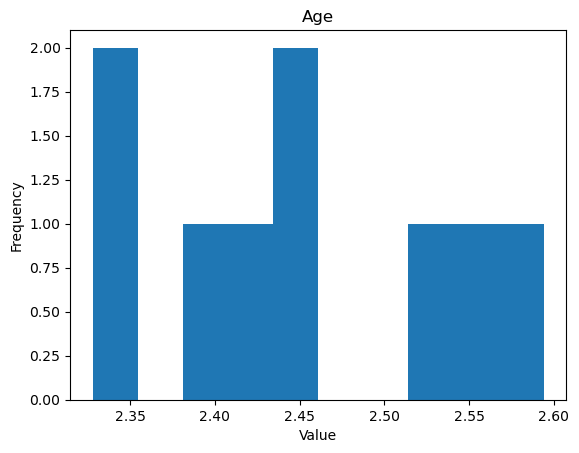

In [43]:
data_MAR['FRT'].plot.hist()

plt.title('Age')
plt.xlabel('Value')
plt.ylabel('Frequency')